# Задача 11. Математическая модель роста опухоли

Клетки опухоли содержат особые вещества (антигены), которые вызывают резкую иммунную реакцию у больного. Эта реакция состоит в том, что производятся клетки — лимфоциты, которые атакуют и уничтожают клетки опухоли. Модель оперирует следующими переменными (имеется в виду плотность названной популяции клеток):

- L — свободные лимфоциты на поверхности опухоли;
- C — опухолевые клетки внутри опухоли и на ее поверхности;
- CS — опухолевые клетки на поверхности опухоли;
- CN — опухолевые клетки на поверхности опухоли, не связанные лимфоцитами;
- CF — опухолевые клетки внутри и на поверхности опухоли, не связанные лимфоцитами;

Ясно, что $C = C_F −C_N + C_S$ . Предполагается, что опухоль всегда имеет форму шара, так что $C_S = K_1C^{\frac{2}{3}}$, где $K_1$ — постоянная, и что взаимодействие опухолевых клеток с лимфоцитами происходит только на поверхности опухоли. Будем считать, что между количеством свободных и связанных лимфоцитами клеток опухоли выполняется соотношение $C_S − C_N = K_2C_NL$ (правдоподобно ли это предположение?). Из приведенных соотношений следует, что $C_F = C − \frac{K_1K_2LC^{\frac{2}{3}}}{(1 + K_2L)}, C_N = \frac{K_1C^{\frac{2}{3}}}{(1 + K_2L)}$, т.е. переменные $L$ и $C$ можно взять за основные переменные модели, которая сводится к системе уравнений
$$L' = (−\lambda_1 + \alpha_1 C_N (1 − \frac{L}{L_M}))L,$$
$$C' = \lambda_2 C_F − \alpha_2 C_N L.$$

Здесь $\lambda_1$ характеризует уровень естественной смертности лимфоцитов, следующее слагаемое — их стимуляцию: когда $L$ мало, стимуляция свободных лимфоцитов возрастает линейно с ростом $C_N$ и что существует максимальный размер популяции $L_M$, при котором стимуляция обращается в нуль. Первое слагаемое во втором уравнении
описывает рост опухоли, не подвергающейся атакам лимфоцитов, а второй член учитывает взаимодействие свободных лимфоцитов с опухолевыми клетками на поверхности опухоли. Подставляя в уравнения значения $C_N$ и $C_F$ , можно переписать их в виде
$$x' = (−\lambda_1 + \frac{\beta_1 y^{\frac{2}{3}}(1 −x/c)}{(1 + x)})x,$$
$$y' = \lambda_2 y − \frac{\beta_2 x y^{\frac{2}{3}}}{(1 + x)}, (1)$$

где $x = K_2L$, $c = K_2L_M $, $y = K_1C$, а $\lambda_1, \lambda_2, \beta_1, \beta_2$ — положительные параметры. Так как $x$ и $y$ — размеры популяций, они должны быть неотрицательными, а $x$ не может превышать $c$, поскольку $L$ ограничено сверху величиной $L_M$ . Уравнения (1) дополняются начальными условиями
$x(0) = x_0, y(0) = y_0$. (2)

In [32]:
import numpy as np                  
import pandas as pd                 
import matplotlib.pyplot as plt

## Задача 1

Напишите программу интегрирования задачи Коши для системы из $n$ уравнений первого порядка вида
$$y\prime = f(t,y), y(0) = y_0, y(t) \in \Re^n,$$

на произвольном отрезке $[a,b]$, используя метод Рунге – Кутты 3-го
порядка точности с постоянным шагом $h$:

$k_1 = f(t_n, y_n),$

$k_2 = f(t_n + \frac{h}{2}, y_n + \frac{h}{2}k_1),$

$k_3 = f(t_n + \frac{3}{4}h, y_n + \frac{3}{4}hk_2),$

$y_{n+1} = y_n + h\frac{2k_1 + 3k_2 + 4k_3}{9}$

In [33]:
def rk3(f, tspan, y0, N):
    '''метод Рунге-Кутта третьего порядка точности'''
    n = len(y0)
    T = np.zeros((N+1))
    Y = np.zeros((N+1, n))
    t = tspan[0]
    y = y0
    h = (tspan[1] - tspan[0])/float(N)
    T[0] = t
    Y[0, :] = np.transpose(y)
    i = 0
    while i < N:
        k1 = f(t, y)
        k2 = f(t + 0.5*h, y + 0.5*h*k1)
        k3 = f(t + 0.75*h, y + 0.75*h*k2)
        
        y = y + h*(2*k1 + 3*k2 + 4*k3)/9
        t += h 
        
        T[i+1] = t
        Y[i+1, :] = np.transpose(y)
        
        i  += 1
        
        # условие основного задание(задача 4): 
        # x не может превышать c
        if y[0] > 3:
            Y = Y[0:i, :]
            T = T[0:i]
            break
        
    return T, Y

## Задача 2

Протестируем программу на примере системы уравнений

$y_1'= \frac{−sin(t)}{(1 + e^{2t})^{1/2}} + y_1(y_1^2 + y_2^2 −1),$

$y_2' = \frac{cos(t)}{(1 + e^{2t})^{1/2}} + y_2(y_1^2 + y_2^2 −1),$

на отрезке $[0,5]$ с точным решением (проверьте!)

$y_1 = \frac{cos(t)}{(1 + e^{2t})^{1/2}}, y_2 = \frac{sin(t)}{(1 + e^{2t})^{1/2}}.$

In [34]:
def f_test(t, y):
    '''функция для правой части тестовой задачи'''
    dy = np.zeros(len(y))
    dy[0] = -np.sin(t) / ((1 + np.exp(2*t))**0.5) + y[0] * (y[0]**2 + y[1]**2 - 1)
    dy[1] = np.cos(t)/ ((1 + np.exp(2*t))**0.5) + y[1] * (y[0]**2 + y[1]**2 - 1) 
    
    return dy

### Данные для тестовой задачи

In [35]:
tspan = np.array([0, 5])
y0 = np.array([1/np.sqrt(2), 0])
N = 20

### Решение 

In [36]:
T, Y = rk3(f_test, tspan, y0, N)

# u1 и y1
u1 = np.array([ np.cos(t) / (1 + np.exp(2*t))**0.5 for t in T ])
lst_err1 = np.abs([u1[i] - Y[i, 0] for i in range(len(Y))])
max_err1 = np.max(lst_err1)

# u2 и y2
u2 = np.array([ np.sin(t) / (1+np.exp(2*t))**0.5 for t in T ] )
lst_err2 = np.abs([u2[i] - Y[i, 1] for i in range(len(Y))])
max_err2 = np.max(lst_err2)

### Таблицы и графики результата работы 

In [37]:
data = {f"$x$": T, 
        f"$y_1$": Y[:, 0],
        f"$u_1$": u1, 
        f"$$\mid u_1 - y_1\mid$$": lst_err1
       }

table1 = pd.DataFrame(data)
 

table1.to_csv('table1.csv', index=False)
table1

,$x$,$y_1$,$u_1$,$$\mid u_1 - y_1\mid$$
0,0.00,0.707107,0.707107,0.000000
1,0.25,0.595379,0.595342,0.000038
2,0.50,0.455161,0.455110,0.000051
3,0.75,0.312556,0.312514,0.000042
4,1.00,0.186554,0.186544,0.000011
5,1.25,0.086811,0.086847,0.000036
6,1.50,0.015322,0.015405,0.000083
7,1.75,-0.030636,-0.030517,0.000119
8,2.00,-0.055949,-0.055811,0.000139
9,2.25,-0.065988,-0.065844,0.000143


In [38]:
data = {f"$x$": T, 
        f"$y_2$": Y[:, 1],
        f"$u_2$": u2, 
        f"$$\mid u_2 - y_2\mid$$": lst_err2
       }

table2 = pd.DataFrame(data)
 

table2.to_csv('table2.csv', index=False)
table2

,$x$,$y_1$,$u_1$,$$\mid u_1 - y_1\mid$$
0,0.00,0.000000,0.000000,0.000000
1,0.25,0.152011,0.152016,0.000005
2,0.50,0.248649,0.248628,0.000021
3,0.75,0.291206,0.291137,0.000069
4,1.00,0.290643,0.290524,0.000118
5,1.25,0.261520,0.261373,0.000147
6,1.50,0.217379,0.217229,0.000149
7,1.75,0.168597,0.168466,0.000130
8,2.00,0.122048,0.121948,0.000099
9,2.25,0.081622,0.081557,0.000065


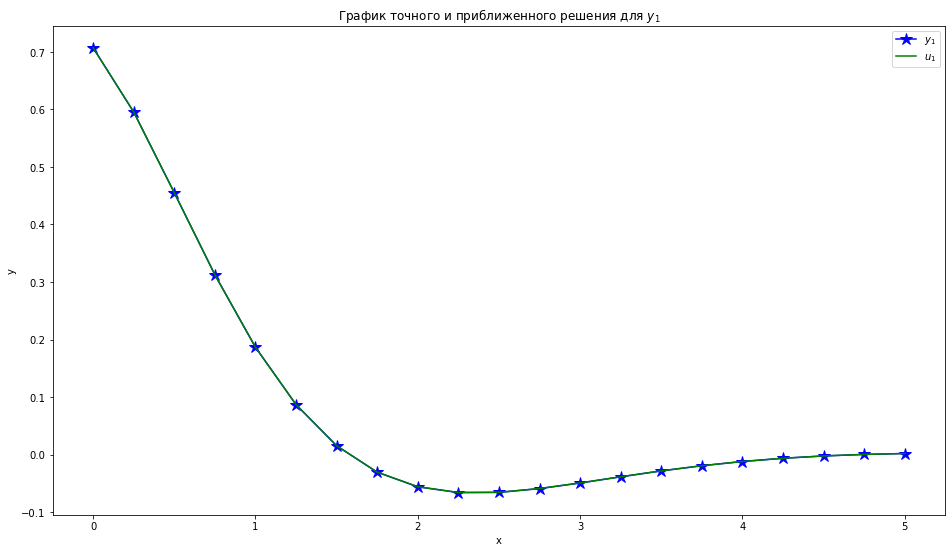

In [39]:
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(T, Y[:, 0], color='blue', marker='*', markersize=12, label=f"$y_1$")  
ax.plot(T, u1, color='green', label=f"$u_1$")

ax.set_xlabel('x') 
ax.set_ylabel('y')
ax.set_title(f"График точного и приближенного решения для $y_1$")

ax.legend()
plt.savefig('1.png')
plt.show()

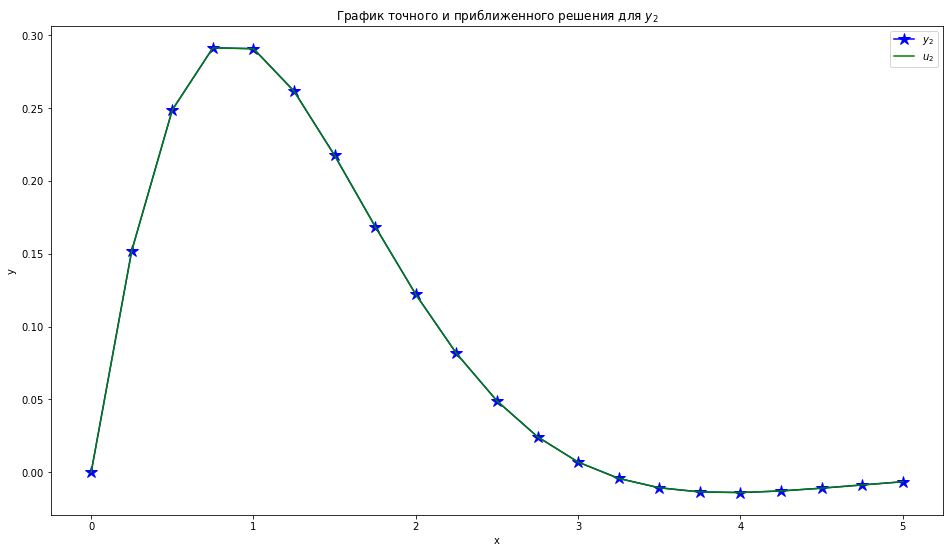

In [40]:
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(T, Y[:, 1], color='blue', marker='*', markersize=12, label=f"$y_2$")  
ax.plot(T, u2, color='green', label=f"$u_2$")

ax.set_xlabel('x') 
ax.set_ylabel('y')
ax.set_title(f"График точного и приближенного решения для $y_2$")

ax.legend() 
plt.savefig('2.png')
plt.show()


In [41]:
print(f"максимальная погрешность между u1 и y1 равна:{max_err1}\n\
максимальная погрешность между u2 и y2 равна:{max_err2}")

максимальная прогрешность между u1 и y1 равна:0.0001434064272469865
максимальная прогрешность между u2 и y2 равна:0.0001494312682666643


## Задание 3

Для тестовой задачи постройте графики зависимости максимальной погрешности решения $e$ и $\frac{e}{h^3}$ от выбранного шага $h$. Какие выводы можно сделать из полученных графиков?

In [42]:
arr_N = np.arange(10,1000,10)

# массив шагов
H = np.array([5/i for i in arr_N])

# массивы погрешности 
arr_err1 = []
arr_err2 = []

for k in range(len(arr_N)):
    nk = arr_N[k]
    T, Y = rk3(f_test, tspan, y0, nk)
    
    # u1 и y1
    u1 = np.array([ np.cos(t) / (1 + np.exp(2*t))**0.5 for t in T ])
    lst_err1 = np.abs([u1[i] - Y[i, 0] for i in range(len(Y))])
    arr_err1 = np.append(arr_err1, np.max(lst_err1))
    

    # u2 и y2
    u2 = np.array([ np.sin(t) / (1+np.exp(2*t))**0.5 for t in T ] )
    lst_err2 = np.abs([u2[i] - Y[i, 1] for i in range(len(Y))])
    arr_err2 = np.append(arr_err2, np.max(lst_err2))

### Графики результата работы 

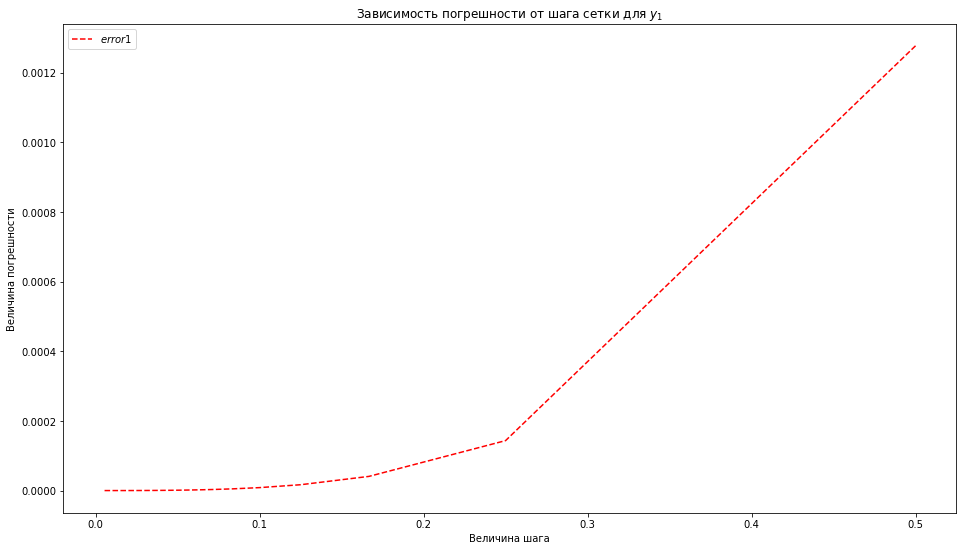

In [43]:
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(H, arr_err1, color='red', linestyle='dashed', label=f"$error1$") 

ax.set_xlabel('Величина шага') 
ax.set_ylabel('Величина погрешности')
ax.set_title(f"Зависимость погрешности от шага сетки для $y_1$")

ax.legend() 
plt.savefig('3.png')
plt.show()


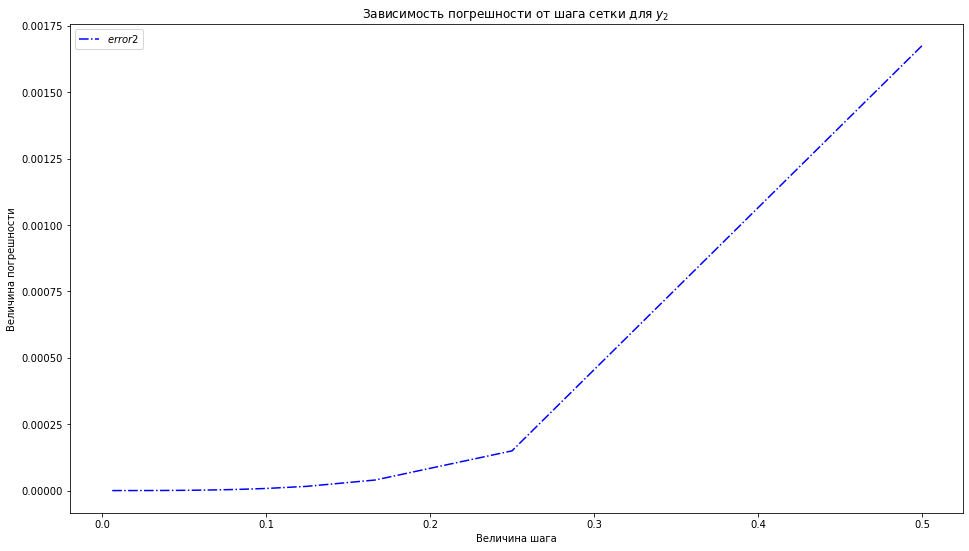

In [44]:
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(H, arr_err2, color='blue', linestyle='dashdot', label=f"$error2$") 

ax.set_xlabel('Величина шага') 
ax.set_ylabel('Величина погрешности')
ax.set_title(f"Зависимость погрешности от шага сетки для $y_2$")

ax.legend() 
plt.savefig('4.png')
plt.show()


In [45]:
arr_err11 = arr_err1/(H**3)
arr_err22 = arr_err2/(H**3)

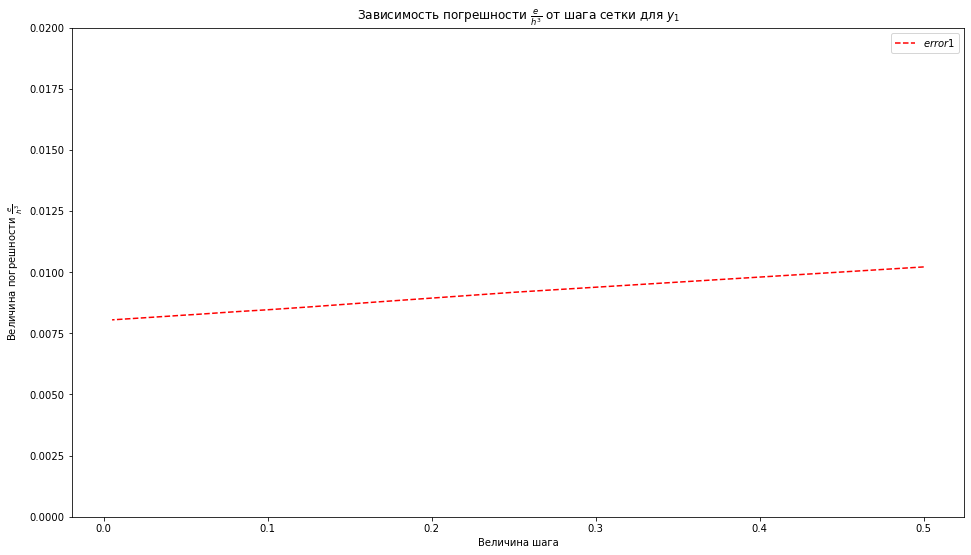

In [46]:
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(H, arr_err11, color='red', linestyle='dashed', label=f"$error1$") 
plt.ylim([0, 0.02])

ax.set_xlabel('Величина шага') 
ax.set_ylabel(r"Величина погрешности $\frac{e}{h^3}$")
ax.set_title(r"Зависимость погрешности $\frac{e}{h^3}$ от шага сетки для $y_1$")

ax.legend() 
plt.savefig('5.png')
plt.show()


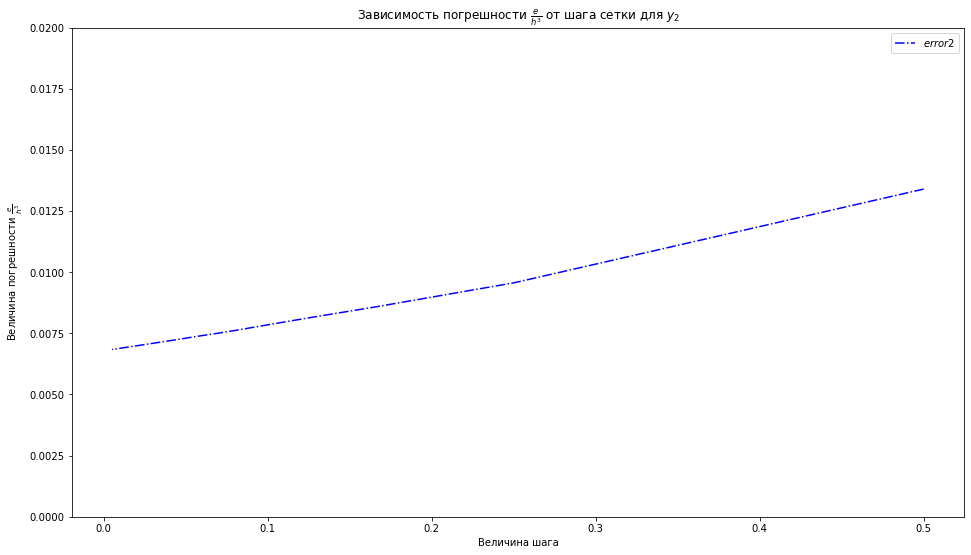

In [47]:
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(H, arr_err22, color='blue', linestyle='dashdot', label=f"$error2$") 
plt.ylim([0, 0.02])

ax.set_xlabel('Величина шага') 
ax.set_ylabel(r"Величина погрешности $\frac{e}{h^3}$")
ax.set_title(r"Зависимость погрешности $\frac{e}{h^3}$ от шага сетки для $y_2$")

ax.legend() 
plt.savefig('6.png')
plt.show()


### Вывод по 3 заданию

- Чем меньше шаг сетки, тем меньше погрешность
- Значения по оси ординат незначительно меняются $\to$ метод действительно имеет третий порядок точности 

## Задача 4

Для значений параметра $\beta_2 = 3; 3.48; 5$ при помощи разработанной процедуры рассчитайте динамику популяции при различных начальных значениях размера опухоли $y_0 \in [0.5,9]$. Постройте графики наиболее характерных решений в координатах $(x,y)$ и дайте их интерпретацию. Параметры: $\lambda_1 = \lambda_2 = 1, \beta_1 = 1, c = 3, t \in [0,20]$.

In [48]:
def f_main(t, u):
    '''функция для правой части главной задачи'''
    global lambda1, lambda2, beta1, beta2, c
    du = np.zeros(len(u))
    x = u[0]
    y = u[1]
    du[0] = (-lambda1 + beta1 * y**(2/3) * (1 - x/c) / (1+x)) * x
    du[1] = lambda2 * y - beta2 * x * y**(2/3) / (1+x)
    
    return du

### Общие параметры

In [49]:
tspan = [0, 20] # время
y0 = [0.1, 0.5] # первое число лимфоциты, второе - опухоль
N = 200         # шаг

global lambda1, lambda2, beta1, beta2, c
lambda1=1
lambda2=1
beta1=1 
c=3

### Эксперимент 1: $\beta_2=3$

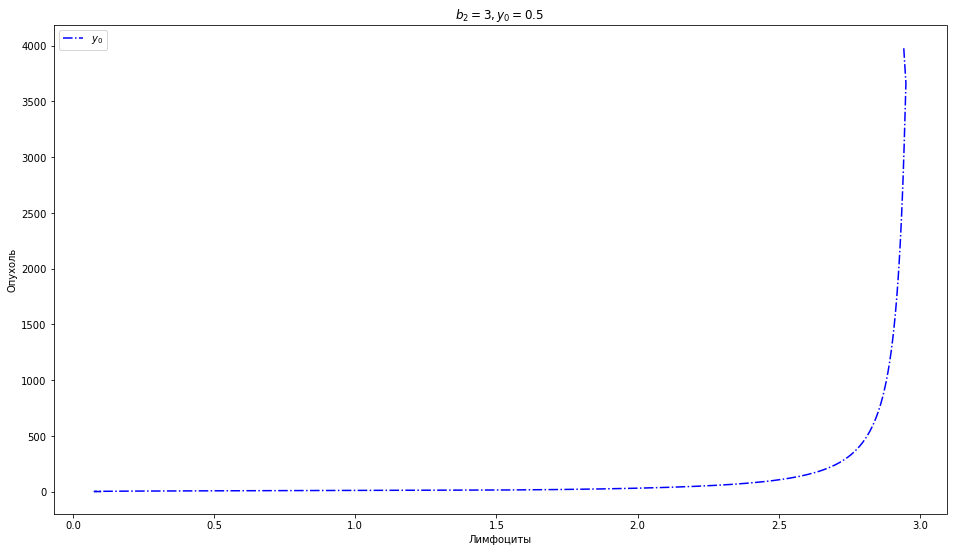

In [50]:
# условие
beta2 = 3   # уровень стемуляции лимфоцитов
y0[1] = 0.5 # количество опухолевых клеток 

# эксперимент
T_05, Y_05 = rk3(f_main, tspan, y0, N)

# график
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(Y_05[:, 0], Y_05[:, 1], color='blue', linestyle='dashdot', label=r"$y_0$" ) 

ax.set_xlabel('Лимфоциты') 
ax.set_ylabel("Опухоль")
ax.set_title(f"$b_2={beta2}, y_0={y0[1]}$")

ax.legend() 
plt.savefig('7.png')
plt.show()


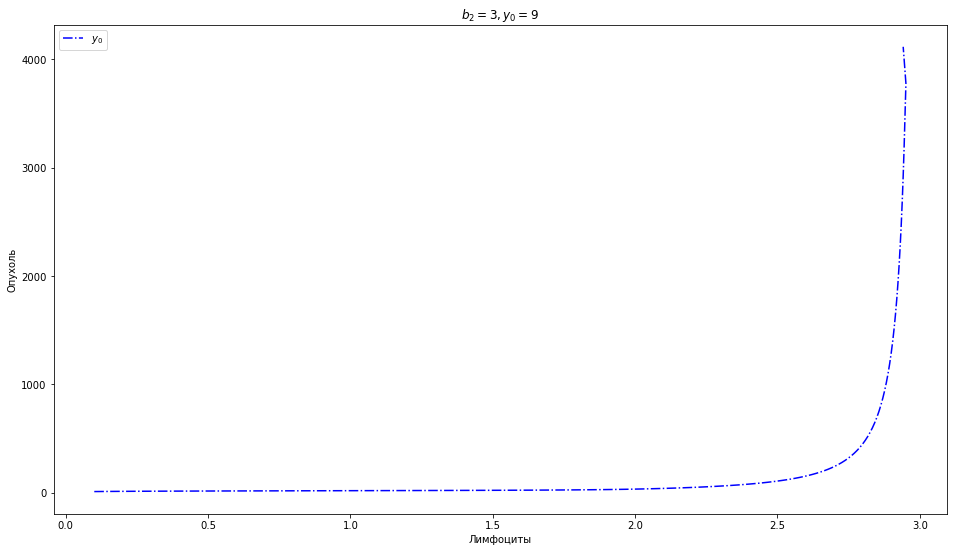

In [51]:
# условие
y0[1] = 9 # количество опухолевых клеток

# эксперимент
T_9, Y_9 = rk3(f_main, tspan, y0, N)

# график 
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(Y_9[:, 0], Y_9[:, 1], color='blue', linestyle='dashdot', label=r"$y_0$") 

ax.set_xlabel('Лимфоциты') 
ax.set_ylabel("Опухоль")
ax.set_title(f"$b_2={beta2}, y_0={y0[1]}$")

ax.legend() 
plt.savefig('8.png')
plt.show()


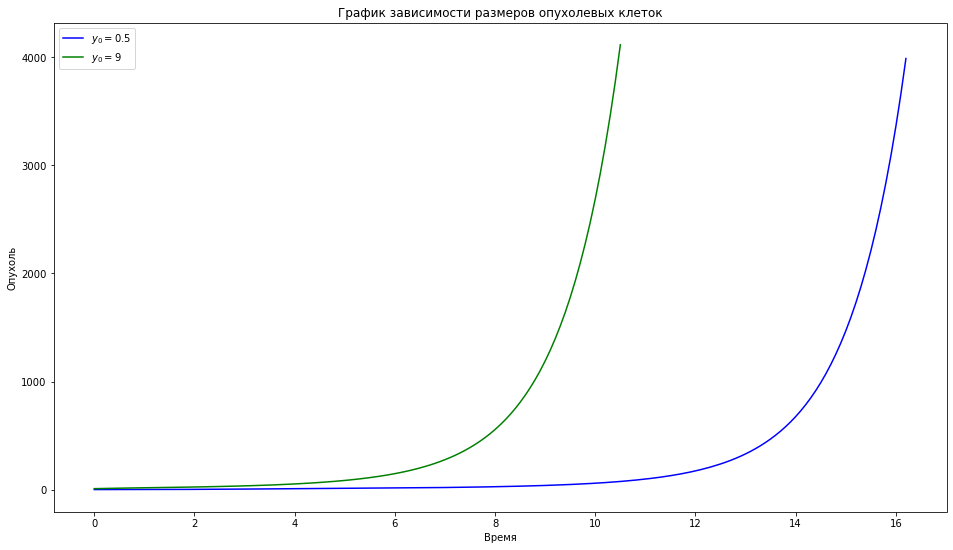

In [52]:
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(T_05, Y_05[:, 1], color='blue', label=r"$y_0=0.5$")  
ax.plot(T_9, Y_9[:, 1], color='green', label=r"$y_0=9$")

ax.set_xlabel('Время') 
ax.set_ylabel('Опухоль')
ax.set_title(r"График зависимости размеров опухолевых клеток")

ax.legend() 
plt.savefig('9.png')
plt.show()


### Первый вывод по графикам

Независимо от начального размера опухоли, лимфоциты не справляются их количество доходит до предельного значения, а опухоль продолжает расти.

Видно, что чем больше первоначальный размер опухали, тем быстрее она расте.

### Эксперимент 2: $\beta_2=3.48$

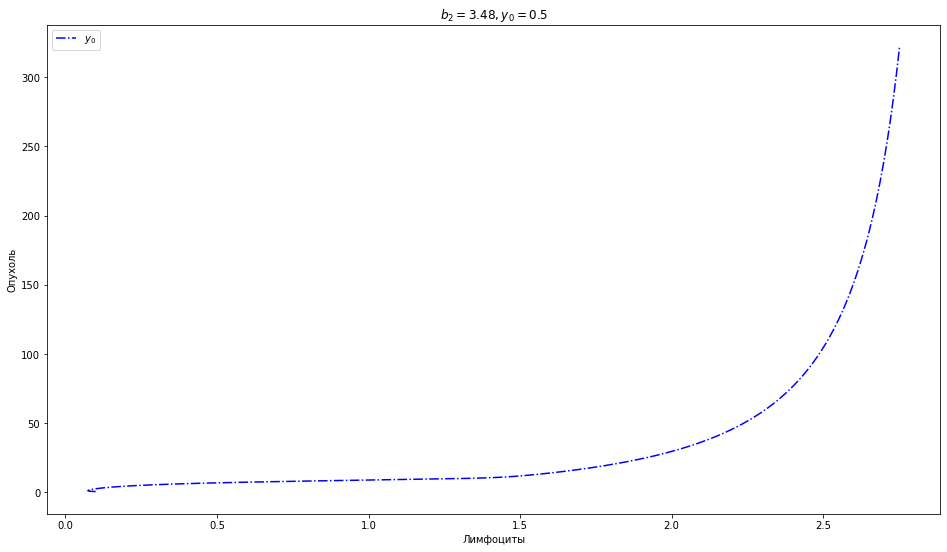

In [53]:
# условие
beta2 = 3.48 # уровень стемуляции лимфоцитов
y0[1] = 0.5  # количество опухолевых клеток

# эксперимент
T_05, Y_05 = rk3(f_main, tspan, y0, N)

#график
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(Y_05[:, 0], Y_05[:, 1], color='blue', linestyle='dashdot', label=r"$y_0$" ) 

ax.set_xlabel('Лимфоциты') 
ax.set_ylabel("Опухоль")
ax.set_title(f"$b_2={beta2}, y_0={y0[1]}$")

ax.legend() 
plt.savefig('10.png')
plt.show()


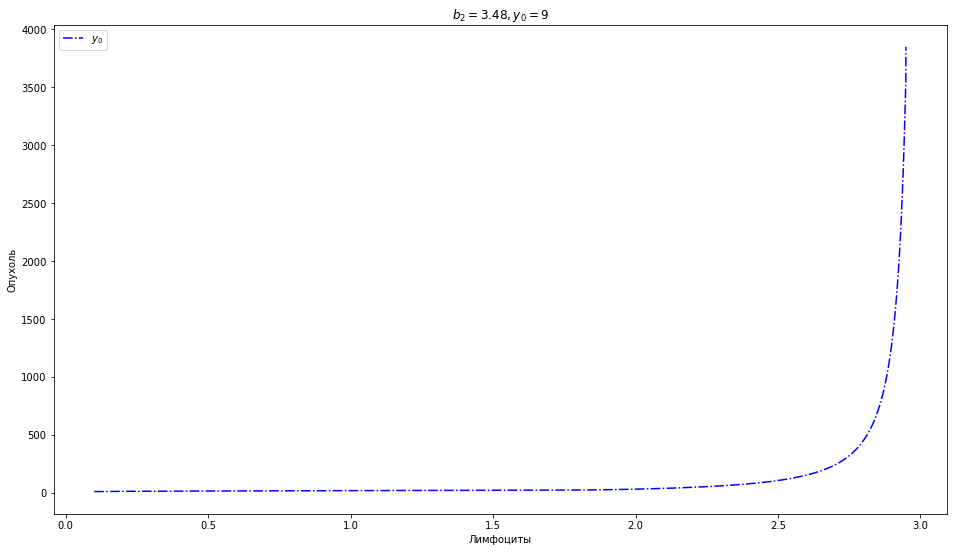

In [54]:
# условие 
y0[1] = 9 # количество опухолевых клеток

# эксперимент
T_9, Y_9 = rk3(f_main, tspan, y0, N)

# график
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(Y_9[:, 0], Y_9[:, 1], color='blue', linestyle='dashdot', label=r"$y_0$") 

ax.set_xlabel('Лимфоциты') 
ax.set_ylabel("Опухоль")
ax.set_title(f"$b_2={beta2}, y_0={y0[1]}$")

ax.legend() 
plt.savefig('11.png')
plt.show()


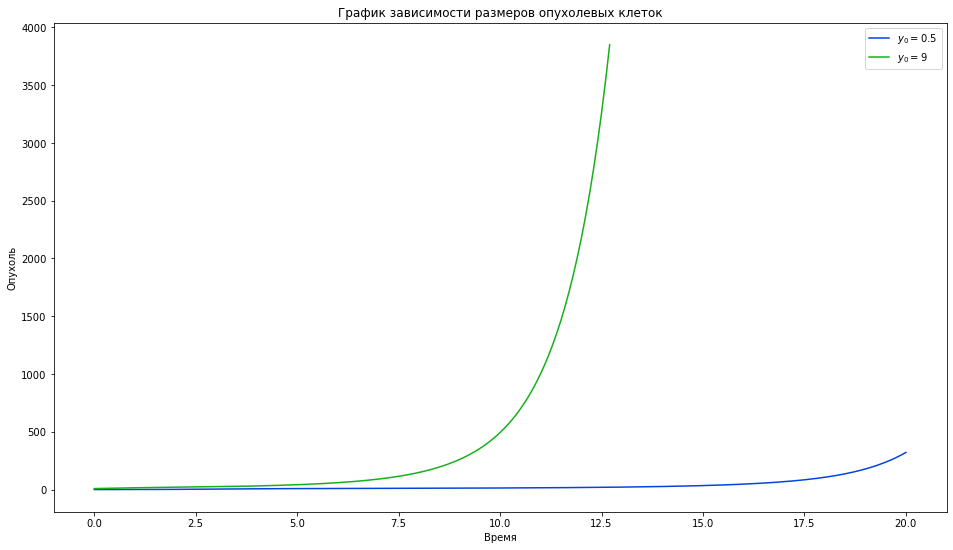

In [55]:
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(T_05, Y_05[:, 1], color='xkcd:blue', label=r"$y_0=0.5$")  
ax.plot(T_9, Y_9[:, 1], color='xkcd:green', label=r"$y_0=9$")

ax.set_xlabel('Время') 
ax.set_ylabel('Опухоль')
ax.set_title(r"График зависимости размеров опухолевых клеток")

ax.legend() 
plt.savefig('12.png')
plt.show()


### Второй вывод по графикам 

Лимфоциты по прежнему не справляются, но видим, что при $y_0=0.5$ конечный размер опухали меньше чем при $y_0=9$

Чем больше первоначальный размер опухоли, тем растет быстрее. Но лимфоциты вырабатываются активнее, что немного тормозят рост опухоли. 

### Эксперимент 3: $\beta_2=5$

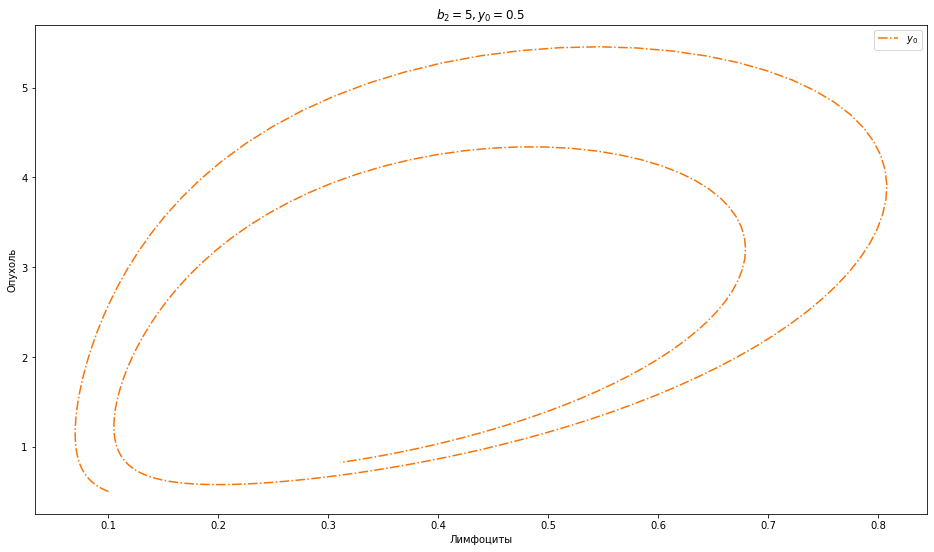

In [56]:
beta2 = 5   # уровень стемуляции лимфоцитов
y0[1] = 0.5 # число опухолевых клеток

# эксперимент
T_05, Y_05 = rk3(f_main, tspan, y0, N)

# график
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(Y_05[:, 0], Y_05[:, 1], color='xkcd:orange', linestyle='dashdot', label=r"$y_0$" ) 

ax.set_xlabel('Лимфоциты') 
ax.set_ylabel("Опухоль")
ax.set_title(f"$b_2={beta2}, y_0={y0[1]}$")

ax.legend() 
plt.savefig('13.png')
plt.show()


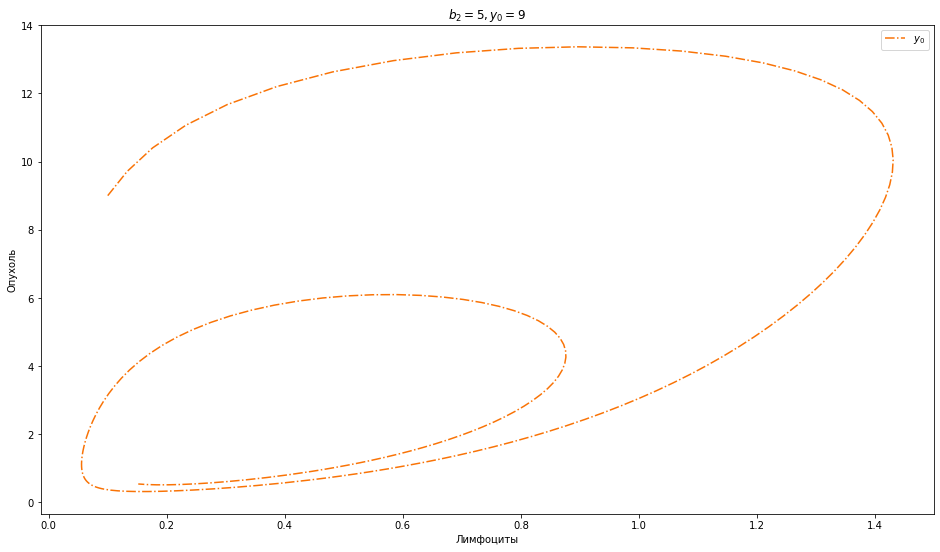

In [57]:
y0[1] = 9 # число опухолевых клеток

# эксперимент
T_9, Y_9 = rk3(f_main, tspan, y0, N)

#график
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(Y_9[:, 0], Y_9[:, 1], color='xkcd:orange', linestyle='dashdot', label=r"$y_0$") 

ax.set_xlabel('Лимфоциты') 
ax.set_ylabel("Опухоль")
ax.set_title(f"$b_2={beta2}, y_0={y0[1]}$")

ax.legend() 
plt.savefig('14.png')
plt.show()


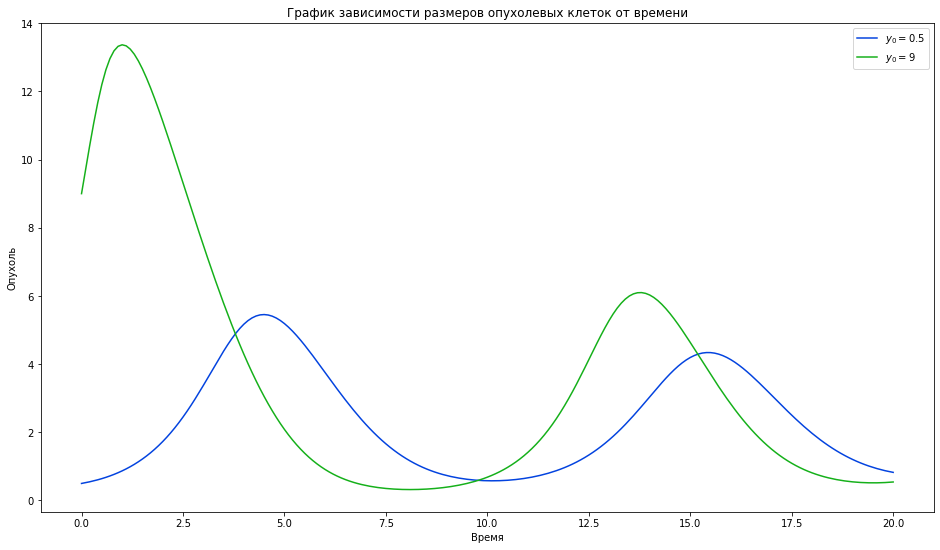

In [58]:
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(T_05, Y_05[:, 1], color='xkcd:blue', label=r"$y_0=0.5$")  
ax.plot(T_9, Y_9[:, 1], color='xkcd:green', label=r"$y_0=9$")

ax.set_xlabel('Время') 
ax.set_ylabel('Опухоль')
ax.set_title(r"График зависимости размеров опухолевых клеток от времени")

ax.legend() 
plt.savefig('15.png')
plt.show()


### Третий вывод по графикам 

Видно, что функция уходит в предельный цикл, т.е лимфоцитов вырабатываются достаточно активно для того, что бы сдерживать рост опухоли. 

Если начальный размер опухоли меньше, чем количество лимфоцитов, то лимфоциты могут сдержать рост опухоли.  

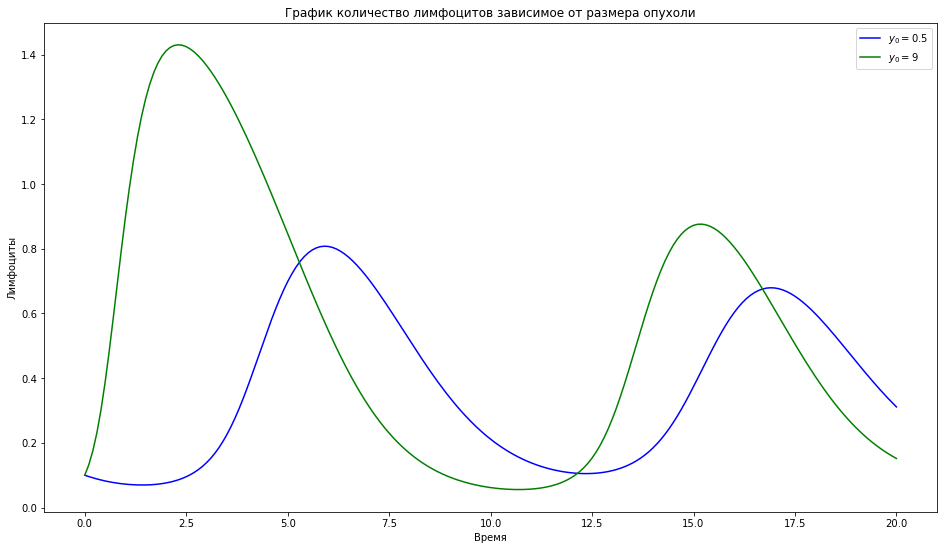

In [59]:
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(T_05, Y_05[:, 0], color='blue', label=r"$y_0=0.5$")  
ax.plot(T_9, Y_9[:, 0], color='green', label=r"$y_0=9$")

ax.set_xlabel('Время') 
ax.set_ylabel('Лимфоциты')
ax.set_title(r"График количество лимфоцитов зависимое от размера опухоли")

ax.legend() 
plt.savefig('16.png')
plt.show()


### Рассмотрим изменение количество опухолевых клеток и лимфоцитов от времени 

Данные останутся такими что и в третьем эксперименте, только увеличим время, теперь оно будет $t\in[0, 250]$

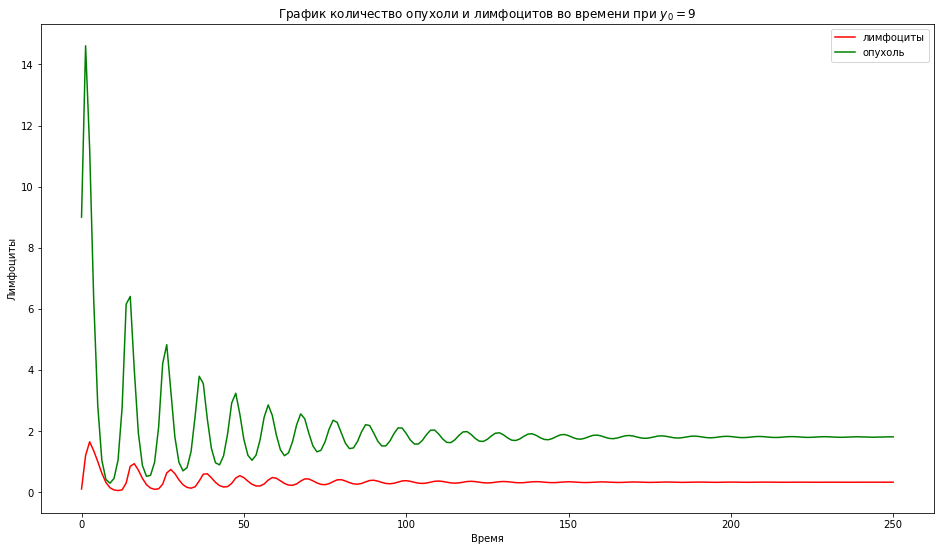

In [60]:
beta2 = 5        # уровень стемуляции лимфоцитов
tspan = [0, 250] # время

# эксперимент
y0[1] = 9 # число опухолевых клеток
T, Y = rk3(f_main, tspan, y0, N)

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(T, Y[:, 0], color='red', label=f'лимфоциты')  
ax.plot(T, Y[:, 1], color='green', label=f'опухоль')

ax.set_xlabel('Время') 
ax.set_ylabel('Лимфоциты')
ax.set_title(f'График количество опухоли и лимфоцитов во времени при $y_0=9$')

ax.legend() 
plt.savefig('17.png')
plt.show()


### Вывод

Увеличение опухолевых клеток порождает увеличение лимфоцитов, которые, в свою очередь, ведут к уменьшению опухоли.

Количество опухолевых клеток не стретитмся к нулю, но и не возрастает.

### Эксперимент: 

Предположим, что первоночальное количество лимфоцитов больше, чем мы делали ранее

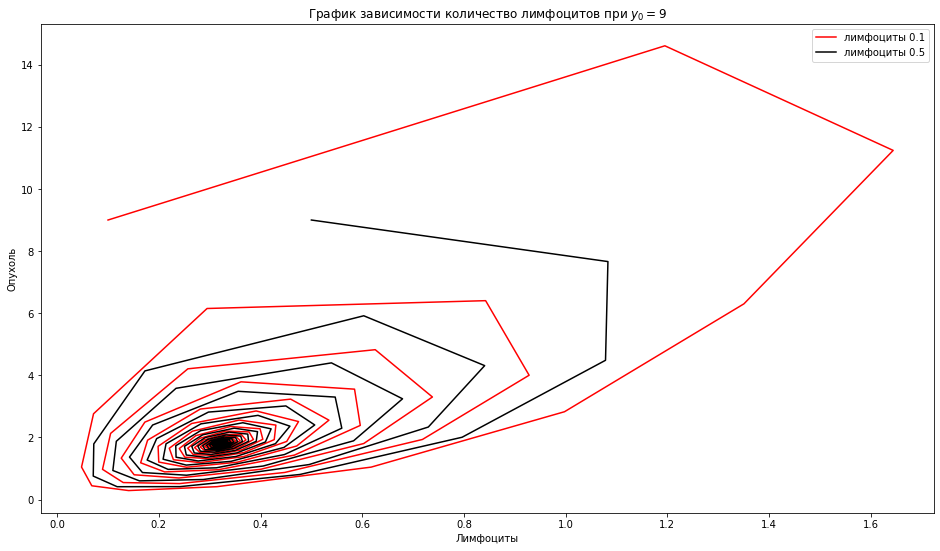

In [61]:
beta2 = 5        # уровень стемуляции лимфоцитов
tspan = [0, 250] # время

# эксперименты
y0 = [0.1, 9] # первое число кол-во лимфоцитов, второе - кол-во опухоли
T1, Y1 = rk3(f_main, tspan, y0, N)

y0 = [0.5, 9] # первое число лимфоцитов, второе - кол-во опухоли
T2, Y2 = rk3(f_main, tspan, y0, N)

# график
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(Y1[:, 0], Y1[:, 1], color='red', label=f'лимфоциты 0.1')  
ax.plot(Y2[:, 0], Y2[:, 1], color='black', label=f'лимфоциты 0.5')

ax.set_xlabel('Лимфоциты') 
ax.set_ylabel("Опухоль")
ax.set_title(f'График зависимости количество лимфоцитов при $y_0=9$')

ax.legend() 
plt.savefig('18.png')
plt.show()


### Вывод 

Так же уходит в предельный цикл но заметно интенсивнее

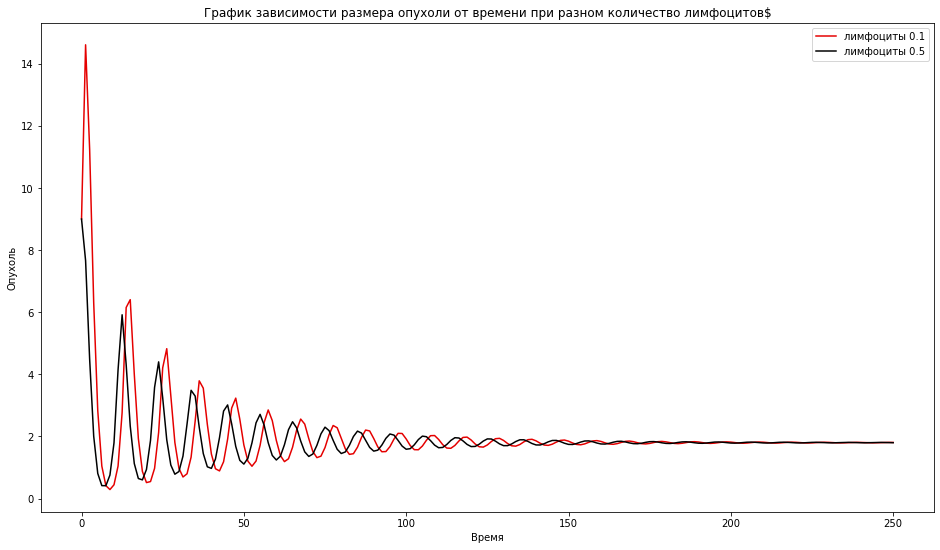

In [62]:
beta2 = 5        # уровень стемуляции лимфоцитов
tspan = [0, 250] # время

# эксперименты
y0 = [0.1, 9] # первое число лимфоциты, второе - опухоль
T1, Y1 = rk3(f_main, tspan, y0, N)

y0 = [0.5, 9] # первое число лимфоциты, второе - опухоль
T2, Y2 = rk3(f_main, tspan, y0, N)

# график
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(T1, Y1[:, 1], color='xkcd:red', label=f'лимфоциты 0.1')  
ax.plot(T2, Y2[:, 1], color='xkcd:black', label=f'лимфоциты 0.5')

ax.set_xlabel('Время') 
ax.set_ylabel("Опухоль")
ax.set_title(f'График зависимости размера опухоли от времени при разном количество лимфоцитов$')

ax.legend() 
plt.savefig('19.png')
plt.show()


### Вывод

Чем меньше начальное количество лимфоцитов, тем более сильное колебание, видно что количество лимфоцитов реагирует на количество опухолевых клеток.

Так же видно, что в пределе опухоль стремится к одному значению, независимо от того, сколько лимфоцитов было до их взаимодействия.